# The First Stars: Formation under X-ray Feedback -- Structure Visualization

This notebook generates all simulation results figures for my current paper.  All simulations run on stampede.tacc.utexas.edu

In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)


In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

In [3]:
import pyGadget

In [4]:
from matplotlib import cm
import matplotlib.colors as cols
def cmap_discretize(cmap, N):
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in xrange(N+1) ]
    # Return colormap object.
    return cols.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

## Density structure zoom-in to central minihalo

Use the final snapshot of the vanilla simulation.

In [5]:
sim = pyGadget.sim.Simulation('stampede/vanilla')
sim.refine_by_mass(False)
sim.set_coordinate_system('physical')
snap = sim.load_snapshot(1900, track_sinks=True)
snap.gas.orient_box(centering='avg', view='face', dens_lim=9e11)

Tracking sinks.
2 sinks found.
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.761e+00 2.757e+00 2.722e+00
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 3.587e-02 -1.391e-01 -1.644e+00


In [6]:
face = [('x', 0.29518), ('z', 0.825), ('x',np.pi/2)]
imzoom = []
for scale in ['5000pc', '500pc', '5pc', '50pc', '100000AU']:
    imzoom.append(pyGadget.visualize.project(snap, 'ndensity', scale, 'xz', centering='avg', pps=1500))
imzoom.append(pyGadget.visualize.project(snap, 'ndensity', '10000AU', face, centering='avg', pps = 1500,
                                         depth=2., dens_lim=None))
#snap.close()

Calculating...
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.761e+03 2.757e+03 2.722e+03
 x:: max: 2.500e+03 min: -2.500e+03
 y:: max: 2.500e+03 min: -2.500e+03
ndensity:: min: 1.533e-03 max: 2.314e+03
log(ndensity):: min: -2.814e+00 max: 3.364e+00
Calculating...
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: -1.341e-13 3.381e-13 2.866e-13
 x:: max: 2.500e+02 min: -2.500e+02
 y:: max: 2.500e+02 min: -2.500e+02
ndensity:: min: 1.073e-02 max: 7.533e+05
log(ndensity):: min: -1.969e+00 max: 5.877e+00
Calculating...
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 3.572e-19 -1.771e-19 3.231e-19
 x:: max: 2.500e+00 min: -2.500e+00
 y:: max: 2.500e+00 min: -2.500e+00
ndensity:: min: 5.120e+01 m

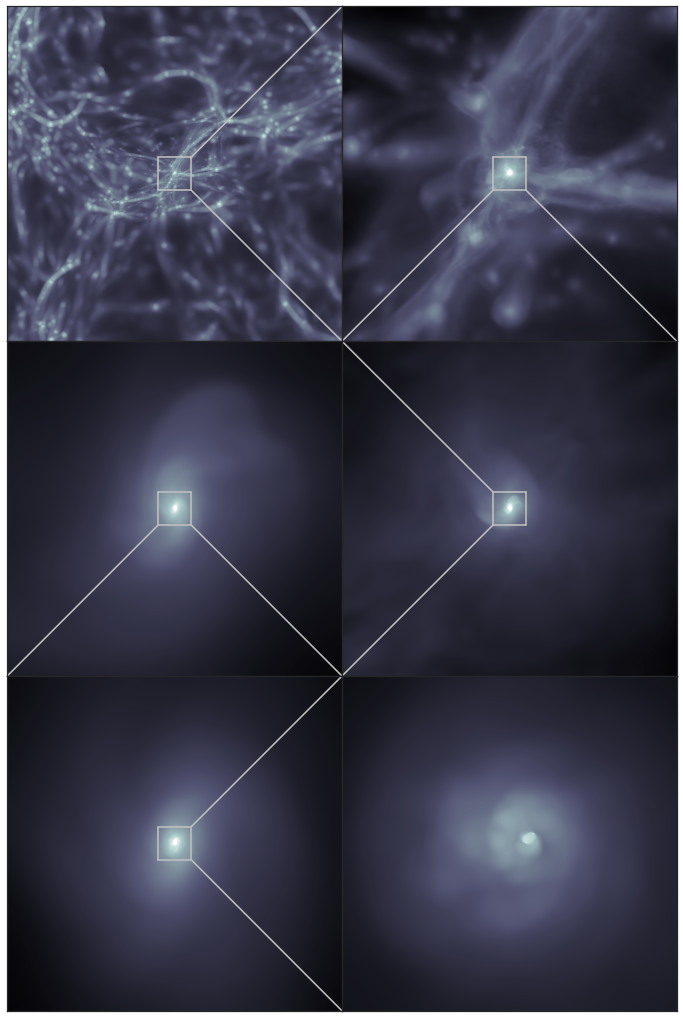

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid

scales = ['140 kpc (comoving)', '1 kpc (physical)', '10 pc (physical)', '100 pc (physical)']
ratio = [.1, .1, .1, .1, .1, None]
zoom = ['right', 'down', 'down', 'left', 'right', None]
clims = [(-3.5,1.5), (-2.,2.), (1.5,7.5), (-0.5,5.), (4.5,9.5), (7.,11.25)]
cmap = cmap_discretize(plt.cm.bone,2048)
zc = '.75'
zls = '-'
zlw = 1.6

fig = plt.figure(1, (12., 18.), dpi=600)
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (3, 2), # creates 2x2 grid of axes
                axes_pad=0.0)# pad between axes in inch.

for i in range(6):
    x = imzoom[i][0]
    y = imzoom[i][1]
    im = imzoom[i][2]
    ax = grid[i]
    img = ax.imshow(im, cmap=cmap, origin='lower')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    img.set_clim(clims[i])
    
#    ax.text(0.5, 0.025, scales[i], color='w', ha='center', va='bottom', size=12, 
#            transform=grid[i].transAxes, bbox=bbox_props)
    
    if ratio[i]:
        axmin, axmax = ax.get_xlim()
        axlength = axmax - axmin
        mid = axlength/2
        s = ratio[i] * axlength
        s00 = [mid - s/2, mid - s/2]
        s01 = [mid - s/2, mid + s/2]
        s11 = [mid + s/2, mid + s/2]
        ax.add_line(plt.Line2D(s00, s01, c=zc, lw=zlw))
        ax.add_line(plt.Line2D(s11, s01, c=zc, lw=zlw))
        ax.add_line(plt.Line2D(s01, s00, c=zc, lw=zlw))
        ax.add_line(plt.Line2D(s01, s11, c=zc, lw=zlw))
        if zoom[i] == 'right':
            ax.add_line(plt.Line2D([mid+s/2, axmax], [mid+s/2, axmax], c=zc, lw=zlw, ls=zls))
            ax.add_line(plt.Line2D([mid+s/2, axmax], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))
        elif zoom[i] == 'down':
            ax.add_line(plt.Line2D([mid-s/2, axmin], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))
            ax.add_line(plt.Line2D([mid+s/2, axmax], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))
        elif zoom[i] == 'left':
            ax.add_line(plt.Line2D([mid-s/2, axmin], [mid+s/2, axmax], c=zc, lw=zlw, ls=zls))
            ax.add_line(plt.Line2D([mid-s/2, axmin], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))

fig.savefig('figures/structure/visualization_entry.png', bbox_inches='tight', dpi=300)